\# Fortune Insights : A MACHINE LEARNING APPROACH TO REVENUE

I performed web scraping to collect data on the largest publicly traded companies
in the United States by revenue, sourced from Wikipedia s Fortune 500 list. After extracting the data,
I cleaned and preprocessed it by handling missing values, converting categorical variables to numeric formats,
and structuring the dataset for analysis. I then conducted data analysis to identify trends in revenue growth,
industry distribution, and company performance. I applied multiple machine learning models, including RandomForestRegressor and XGBoost,
 to predict revenue growth, tuning the models for optimal performance. The conclusion showed that XGBoost outperformed other models,
providing accurate predictions, with a notable R-squared value of 0.74, demonstrating the effectiveness of the machine learning approach for business insights**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)

page = requests.get(url)
soup = BeautifulSoup(response.text, "html5lib")



In [ ]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-f

In [ ]:
table = soup.find("table", {"class": "wikitable sortable"})
rows = table.find_all("tr")[1:]
companies = []
# Skip the header row (first row)
rows = table.find_all("tr")[1:]
for row in rows:
    cols = row.find_all("td")
    if len(cols) > 6:
        # Extract the company details from each row
        rank = cols[0].text.strip()
        name = cols[1].text.strip()
        industry = cols[2].text.strip()
        revenue = cols[3].text.strip()
        revenue_growth = cols[4].text.strip()
        employees = cols[5].text.strip()
        headquarters = cols[6].text.strip()
        company_data = {
            "Rank": rank,
            "Name": name,
            "Industry": industry,
            "Revenue (USD millions)": revenue,
            "Revenue Growth": revenue_growth,
            "Employees": employees,
            "Headquarters": headquarters
        }

        companies.append(company_data)

for company in companies:
    print(company)

{'Rank': '1', 'Name': 'Walmart', 'Industry': 'Retail', 'Revenue (USD millions)': '648,125', 'Revenue Growth': '6.0%', 'Employees': '2,100,000', 'Headquarters': 'Bentonville, Arkansas'}
{'Rank': '2', 'Name': 'Amazon', 'Industry': 'Retail and cloud computing', 'Revenue (USD millions)': '574,785', 'Revenue Growth': '11.9%', 'Employees': '1,525,000', 'Headquarters': 'Seattle, Washington'}
{'Rank': '3', 'Name': 'Apple', 'Industry': 'Electronics industry', 'Revenue (USD millions)': '383,482', 'Revenue Growth': '-2.8%', 'Employees': '161,000', 'Headquarters': 'Cupertino, California'}
{'Rank': '4', 'Name': 'UnitedHealth Group', 'Industry': 'Healthcare', 'Revenue (USD millions)': '371,622', 'Revenue Growth': '14.6%', 'Employees': '440,000', 'Headquarters': 'Minnetonka, Minnesota'}
{'Rank': '5', 'Name': 'Berkshire Hathaway', 'Industry': 'Conglomerate', 'Revenue (USD millions)': '364,482', 'Revenue Growth': '20.7%', 'Employees': '396,500', 'Headquarters': 'Omaha, Nebraska'}
{'Rank': '6', 'Name': 

In [ ]:
df = pd.DataFrame(companies)

# Display the DataFrame
print(df)

   Rank                  Name                    Industry  \
0     1               Walmart                      Retail   
1     2                Amazon  Retail and cloud computing   
2     3                 Apple        Electronics industry   
3     4    UnitedHealth Group                  Healthcare   
4     5    Berkshire Hathaway                Conglomerate   
..  ...                   ...                         ...   
95   96                  TIAA                  Financials   
96   97                   CHS     Agriculture cooperative   
97   98  Bristol-Myers Squibb     Pharmaceutical industry   
98   99  Dow Chemical Company           Chemical industry   
99  100              Best Buy                      Retail   

   Revenue (USD millions) Revenue Growth  Employees  \
0                 648,125           6.0%  2,100,000   
1                 574,785          11.9%  1,525,000   
2                 383,482          -2.8%    161,000   
3                 371,622          14.6%    440

In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [ ]:
# Remove commas from 'Employees' and convert to numeric
df['Employees'] = df['Employees'].replace({',': ''}, regex=True).astype(float)

df['Employees'] = df['Employees'].fillna(df['Employees'].median())

# Alternatively, drop rows with missing critical data
df.dropna(subset=['Rank', 'Name', 'Revenue (USD millions)'], inplace=True)

# Check if there are any missing values now
print(df.isnull().sum())


Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue Growth            0
Employees                 0
Headquarters              0
dtype: int64


In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0%,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9%,1525000.0,"Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8%,161000.0,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6%,440000.0,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7%,396500.0,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735.0,11.8%,16023.0,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590.0,-4.6%,10609.0,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5%,34100.0,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6%,35900.0,"Midland, Michigan"


In [ ]:

df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace({',': ''}, regex=True).astype(float)
df['Employees'] = df['Employees'].replace({',': ''}, regex=True).astype(float)


In [ ]:

# Convert 'Revenue Growth' from string to numeric percentage
df['Revenue Growth'] = df['Revenue Growth'].replace('%', '', regex=True).astype(float)


In [ ]:
# Get summary statistics
print(df.describe())

       Revenue (USD millions)  Revenue Growth     Employees
count              100.000000      100.000000  1.000000e+02
mean            122346.090000        6.078000  1.626779e+05
std             107882.041929       21.022996  2.669024e+05
min              43452.000000      -41.700000  4.137000e+03
25%              54608.500000       -6.175000  4.500000e+04
50%              80296.000000        5.950000  8.650000e+04
75%             149927.250000       13.025000  1.891625e+05
max             648125.000000      125.900000  2.100000e+06


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue Growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.6+ KB
None


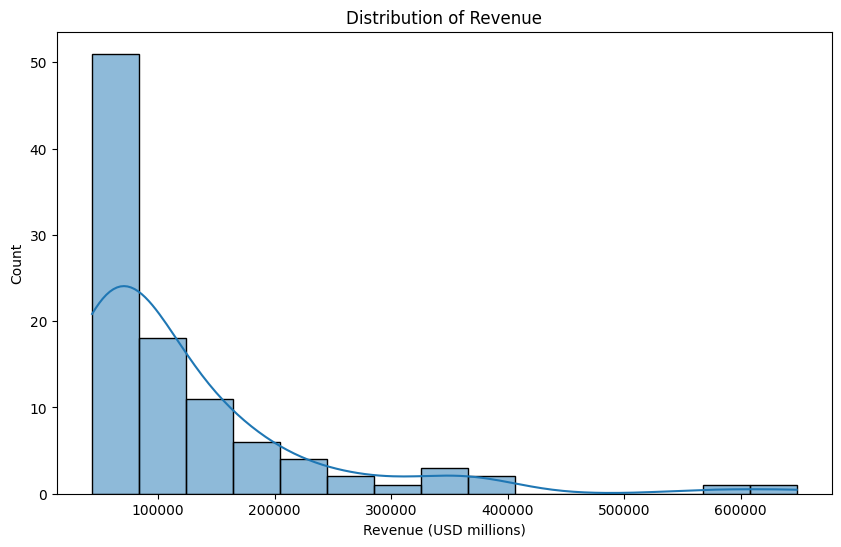

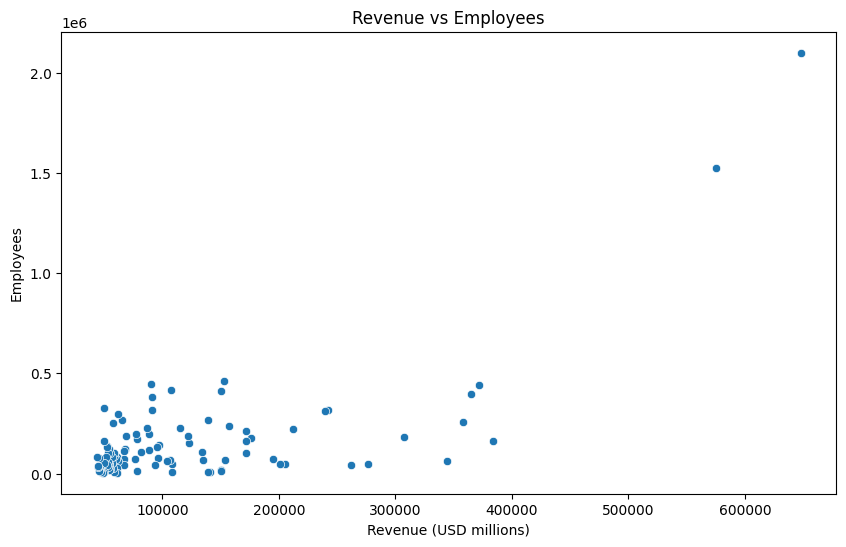

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Revenue
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue (USD millions)'], kde=True)
plt.title('Distribution of Revenue')
plt.show()

# Scatter plot for Revenue vs Employees
plt.figure(figsize=(10,6))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=df)
plt.title('Revenue vs Employees')
plt.show()


In [ ]:
# Data Transformation for Machine Learning


In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8,161000.0,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735.0,11.8,16023.0,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590.0,-4.6,10609.0,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5,34100.0,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6,35900.0,"Midland, Michigan"


In [ ]:
# Create a 'Revenue Growth Category' based on the growth rate
df['Revenue Growth Category'] = df['Revenue Growth'].apply(lambda x: 'High Growth' if x > 10 else 'Low Growth')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaling numeric columns (e.g., 'Revenue (USD millions)', 'Employees')
df[['Revenue (USD millions)', 'Employees']] = scaler.fit_transform(df[['Revenue (USD millions)', 'Employees']])


In [ ]:
#  One-Hot Encoding for Categorical Features
# Many ML models require categorical variables to be encoded into numeric values.
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=['Industry', 'Revenue Growth Category'], drop_first=True)


In [ ]:
df

,Rank,Name,Revenue (USD millions),Revenue Growth,Employees,Headquarters,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,...,Industry_Pharmaceutical industry,Industry_Pharmacy wholesale,Industry_Retail,Industry_Retail and cloud computing,Industry_Technology,Industry_Technology and cloud computing,Industry_Telecom hardware manufacturing,Industry_Telecommunications,Industry_Transportation,Revenue Growth Category_Low Growth
0,1,Walmart,4.898199,6.0,7.295108,"Bentonville, Arkansas",False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2,Amazon,4.214957,11.9,5.129910,"Seattle, Washington",False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,Apple,2.432763,-2.8,-0.006318,"Cupertino, California",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,UnitedHealth Group,2.322275,14.6,1.044274,"Minnetonka, Minnesota",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Berkshire Hathaway,2.255758,20.7,0.880472,"Omaha, Nebraska",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,TIAA,-0.713715,11.8,-0.552238,"New York City, New York",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,97,CHS,-0.715066,-4.6,-0.572625,"Inver Grove Heights, Minnesota",True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
97,98,Bristol-Myers Squibb,-0.720507,-2.5,-0.484168,"New York City, New York",False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
98,99,Dow Chemical Company,-0.724084,-21.6,-0.477390,"Midland, Michigan",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.columns

Index(['Rank', 'Name', 'Revenue (USD millions)', 'Revenue Growth', 'Employees',
       'Headquarters', 'Industry_Agriculture cooperative',
       'Industry_Agriculture manufacturing', 'Industry_Airline',
       'Industry_Apparel', 'Industry_Automotive and energy',
       'Industry_Automotive industry', 'Industry_Beverage',
       'Industry_Chemical industry', 'Industry_Conglomerate',
       'Industry_Conglomerate and telecommunications',
       'Industry_Consumer products manufacturing',
       'Industry_Electronics industry', 'Industry_Energy trading',
       'Industry_Financial', 'Industry_Financial services',
       'Industry_Financials', 'Industry_Food industry',
       'Industry_Food processing', 'Industry_Food service', 'Industry_Health',
       'Industry_Health insurance', 'Industry_Healthcare', 'Industry_Infotech',
       'Industry_Insurance', 'Industry_Machinery', 'Industry_Media',
       'Industry_Petroleum industry', 'Industry_Pharmaceutical industry',
       'Industry_Pharm

In [ ]:
# Distribution of Revenue Growth
# To understand the distribution of the Revenue Growth variable

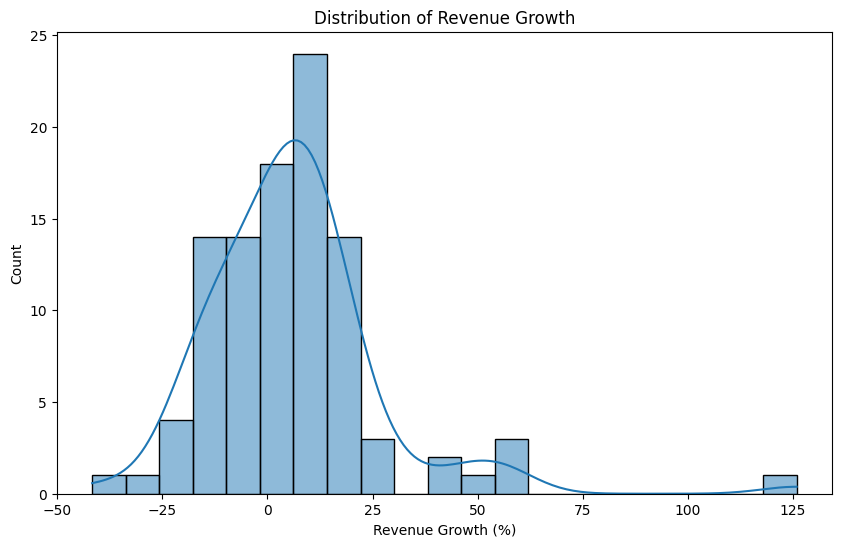

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue Growth'], kde=True)
plt.title("Distribution of Revenue Growth")
plt.xlabel("Revenue Growth (%)")
plt.show()


In [ ]:
# Correlation Heatmap
# To see how numeric features correlate with each other:

In [ ]:
#  Count of Industries
# Since  dataset includes many binary columns representing industries, WE can count how many companies belong to each industry:

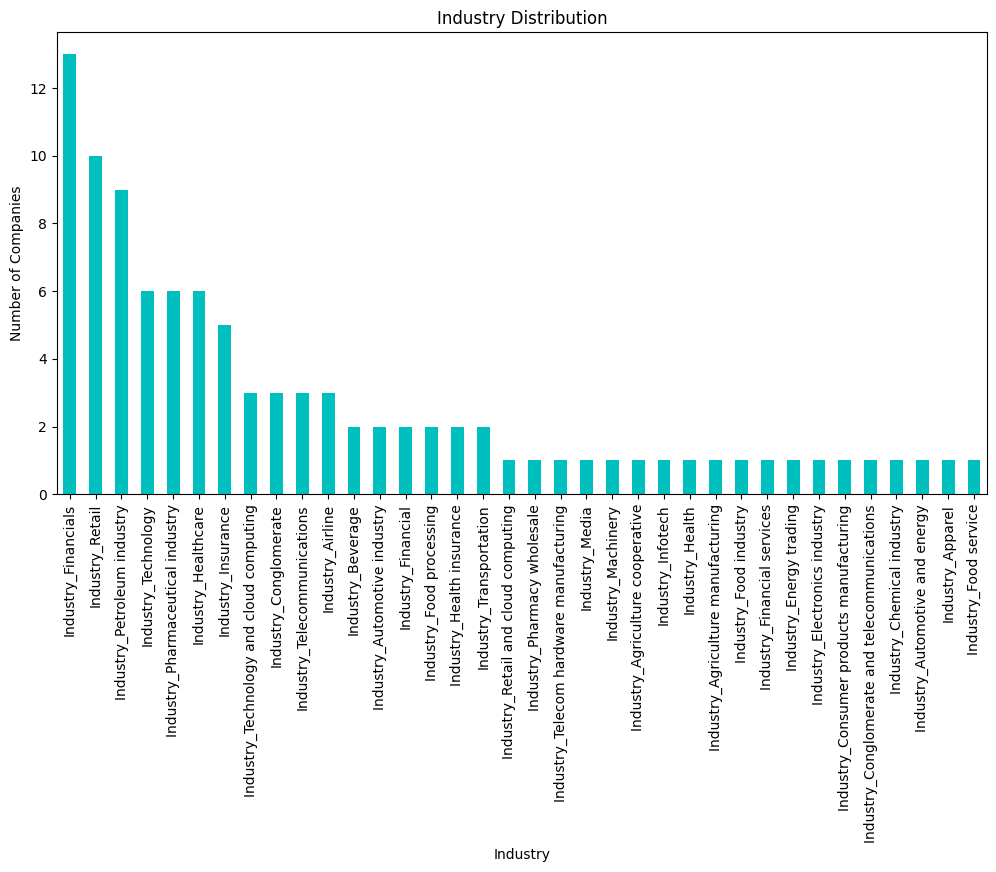

In [ ]:
industry_columns = [col for col in df.columns if 'Industry' in col]
industry_counts = df[industry_columns].sum().sort_values(ascending=False)
industry_counts.plot(kind='bar', figsize=(12, 6), color='c')
plt.title("Industry Distribution")
plt.xlabel("Industry")
plt.ylabel("Number of Companies")
plt.show()


In [ ]:
df

,Rank,Name,Revenue (USD millions),Revenue Growth,Employees,Headquarters,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,...,Industry_Pharmaceutical industry,Industry_Pharmacy wholesale,Industry_Retail,Industry_Retail and cloud computing,Industry_Technology,Industry_Technology and cloud computing,Industry_Telecom hardware manufacturing,Industry_Telecommunications,Industry_Transportation,Revenue Growth Category_Low Growth
0,1,Walmart,4.898199,6.0,7.295108,"Bentonville, Arkansas",False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2,Amazon,4.214957,11.9,5.129910,"Seattle, Washington",False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,Apple,2.432763,-2.8,-0.006318,"Cupertino, California",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,UnitedHealth Group,2.322275,14.6,1.044274,"Minnetonka, Minnesota",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Berkshire Hathaway,2.255758,20.7,0.880472,"Omaha, Nebraska",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,TIAA,-0.713715,11.8,-0.552238,"New York City, New York",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,97,CHS,-0.715066,-4.6,-0.572625,"Inver Grove Heights, Minnesota",True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
97,98,Bristol-Myers Squibb,-0.720507,-2.5,-0.484168,"New York City, New York",False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
98,99,Dow Chemical Company,-0.724084,-21.6,-0.477390,"Midland, Michigan",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 1. Handle 'Headquarters' column by Label Encoding (since it is categorical text data)
label_encoder = LabelEncoder()
df['Headquarters'] = label_encoder.fit_transform(df['Headquarters'])

# 2. Drop the non-predictive columns 'Rank' and 'Name'
X = df.drop(['Rank', 'Name', 'Revenue Growth'], axis=1)

# 3. Define the target variable 'Revenue Growth'
y = df['Revenue Growth']

# 4. Check for any missing values and handle them (for example, filling with mean for simplicity)
X = X.fillna(X.mean())

# 5. Standardize/scale the numeric features
scaler = StandardScaler()
X[['Revenue (USD millions)', 'Employees']] = scaler.fit_transform(X[['Revenue (USD millions)', 'Employees']])

# 6. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now your data is ready for modeling


In [ ]:
df

,Rank,Name,Revenue (USD millions),Revenue Growth,Employees,Headquarters,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,...,Industry_Pharmaceutical industry,Industry_Pharmacy wholesale,Industry_Retail,Industry_Retail and cloud computing,Industry_Technology,Industry_Technology and cloud computing,Industry_Telecom hardware manufacturing,Industry_Telecommunications,Industry_Transportation,Revenue Growth Category_Low Growth
0,1,Walmart,4.898199,6.0,7.295108,5,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2,Amazon,4.214957,11.9,5.129910,64,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,Apple,2.432763,-2.8,-0.006318,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,UnitedHealth Group,2.322275,14.6,1.044274,43,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Berkshire Hathaway,2.255758,20.7,0.880472,52,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,TIAA,-0.713715,11.8,-0.552238,49,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,97,CHS,-0.715066,-4.6,-0.572625,30,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
97,98,Bristol-Myers Squibb,-0.720507,-2.5,-0.484168,49,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
98,99,Dow Chemical Company,-0.724084,-21.6,-0.477390,41,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Model Selection and Training
# We'll use a Random Forest Regressor, which is a powerful model for regression tasks and can handle both linear and non-linear relationships.

In [ ]:
# Training the Model
# We'll train the model on the training data (X_train and y_train), and then evaluate its performance using the test data (X_test and y_test).

#  Evaluating the Model
# We'll evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 7.673350000000001
Mean Squared Error (MSE): 127.42597575000005
R-squared (R²): 0.2168294743363417


In [ ]:
# XGBoost
# XGBoost is another gradient boosting method that is known for its speed and performance, particularly for structured/tabular data.
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE) with XGBoost: {mae_xgb}")
print(f"Mean Squared Error (MSE) with XGBoost: {mse_xgb}")
print(f"R-squared (R²) with XGBoost: {r2_xgb}")


Mean Absolute Error (MAE) with XGBoost: 5.384312921911478
Mean Squared Error (MSE) with XGBoost: 43.085736761514646
R-squared (R²) with XGBoost: 0.7351915187659732


In [ ]:
# XGBoost is the best-performing model among the three.
# It has the lowest MAE (5.38), lowest MSE (43.09), and highest R² (0.735).
# Compared to Random Forest, XGBoost gives better accuracy and lower error metrics, especially when tuned with GridSearchCV.